In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sqlalchemy import create_engine

In [3]:
pull_from_sql = create_engine("sqlite:///mta_data.db")

In [4]:
pull_from_sql.table_names()

<ipython-input-4-5ec600fb140a>:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  pull_from_sql.table_names()


['mta_data']

In [5]:
df = pd.read_sql("SELECT * FROM mta_data;", pull_from_sql)

Let's first look at the columns in the table to ensure we have the right table.

In [6]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

We have the correct columns in this table, the first step is to clean the data. We will begin by combining the DATE and TIME columns in order to get a DATETIME column.

In [8]:
df['DATETIME'] = pd.to_datetime(df['DATE'] + ' ' + df['TIME'])

In [30]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/24/2019,00:00:00,REGULAR,7176756,2430372,2019-08-24 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/24/2019,04:00:00,REGULAR,7176772,2430375,2019-08-24 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/24/2019,08:00:00,REGULAR,7176786,2430408,2019-08-24 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/24/2019,12:00:00,REGULAR,7176862,2430481,2019-08-24 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/24/2019,16:00:00,REGULAR,7177008,2430520,2019-08-24 16:00:00


The next step of data cleaning is making sure that we only have one unique value. We see that there are duplicate values for rows when they are listed as RECOVR AUD. This is a recovery audit for the same location for the same time that was already listed as REGULAR. Let's look at an example of this.

In [69]:
df.groupby(['C/A','UNIT','SCP',"STATION","DATETIME"]).ENTRIES.count().reset_index().sort_values('ENTRIES',ascending=False).head()

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES
1556048,N418,R269,01-05-00,BEDFORD-NOSTRAN,2016-08-06 16:00:00,2
1556058,N418,R269,01-05-00,BEDFORD-NOSTRAN,2016-08-08 08:00:00,2
1556065,N418,R269,01-05-00,BEDFORD-NOSTRAN,2016-08-09 12:00:00,2
1556064,N418,R269,01-05-00,BEDFORD-NOSTRAN,2016-08-09 08:00:00,2
1556063,N418,R269,01-05-00,BEDFORD-NOSTRAN,2016-08-09 04:00:00,2


In [33]:
df[(df['C/A'] == 'A034') & (df['UNIT'] == 'R170') & (df['SCP'] == '03-05-03') & (
        df['STATION'] == '14 ST-UNION SQ') & ((df['DATE'] == '08/10/2019') | (df['DATE'] == '08/09/2019') | (df['DATE']
        == '08/11/2019') | (df['DATE'] == '08/12/2019'))]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
416156,A034,R170,03-05-03,14 ST-UNION SQ,LNQR456W,BMT,08/10/2019,01:00:00,REGULAR,25573,20003,2019-08-10 01:00:00
416157,A034,R170,03-05-03,14 ST-UNION SQ,LNQR456W,BMT,08/10/2019,01:00:00,RECOVR AUD,24728,30019,2019-08-10 01:00:00
416158,A034,R170,03-05-03,14 ST-UNION SQ,LNQR456W,BMT,08/10/2019,05:00:00,REGULAR,25597,20023,2019-08-10 05:00:00
416159,A034,R170,03-05-03,14 ST-UNION SQ,LNQR456W,BMT,08/10/2019,05:00:00,RECOVR AUD,24745,30042,2019-08-10 05:00:00
416160,A034,R170,03-05-03,14 ST-UNION SQ,LNQR456W,BMT,08/10/2019,09:00:00,REGULAR,25633,20172,2019-08-10 09:00:00
416161,A034,R170,03-05-03,14 ST-UNION SQ,LNQR456W,BMT,08/10/2019,09:00:00,RECOVR AUD,24758,30136,2019-08-10 09:00:00
416162,A034,R170,03-05-03,14 ST-UNION SQ,LNQR456W,BMT,08/10/2019,13:00:00,REGULAR,25815,20527,2019-08-10 13:00:00
416163,A034,R170,03-05-03,14 ST-UNION SQ,LNQR456W,BMT,08/10/2019,13:00:00,RECOVR AUD,24966,30384,2019-08-10 13:00:00
416164,A034,R170,03-05-03,14 ST-UNION SQ,LNQR456W,BMT,08/10/2019,17:00:00,REGULAR,26160,20964,2019-08-10 17:00:00
416165,A034,R170,03-05-03,14 ST-UNION SQ,LNQR456W,BMT,08/10/2019,17:00:00,RECOVR AUD,25342,30689,2019-08-10 17:00:00


In this example, we see that the RECOVR AUD rows would cause a discrepancy when creating a time series with the REGULAR rows because the entries on the 10th in the RECOVR AUD rows is lower than the ones on the 9th in REGULAR. Let's look at how many rows have RECOVR AUD on them.

In [34]:
df.DESC.value_counts()

REGULAR       3368831
RECOVR AUD      12847
Name: DESC, dtype: int64

Since it is such a small portion of the data, we are going to ignore these rows and only look at the information that has the value REGULAR in that column.


In [35]:
first_viz = df[df['DESC'] == 'REGULAR']

In [37]:
duplicate_check = first_viz.groupby(['C/A','UNIT','SCP','STATION', 'DATETIME']).count()
duplicate_check[duplicate_check['ENTRIES'] != 1]

,,,,,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
C/A,UNIT,SCP,STATION,DATETIME,,,,,,,


With this duplicate check, we see that there are no more duplicate values so we can move on with creating our time series with this data. First, lets drop the columns that we will not need for our first visual.

In [39]:
first_viz.drop(['DIVISION','LINENAME'],inplace=True, axis=1)

/Users/liammoran/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [42]:
first_viz['YEAR'] = first_viz.DATETIME.dt.year
first_viz.head()


<ipython-input-42-87be519daa96>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_viz['YEAR'] = first_viz.DATETIME.dt.year


,C/A,UNIT,SCP,STATION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,YEAR
0,A002,R051,02-00-00,59 ST,08/24/2019,00:00:00,REGULAR,7176756,2430372,2019-08-24 00:00:00,2019
1,A002,R051,02-00-00,59 ST,08/24/2019,04:00:00,REGULAR,7176772,2430375,2019-08-24 04:00:00,2019
2,A002,R051,02-00-00,59 ST,08/24/2019,08:00:00,REGULAR,7176786,2430408,2019-08-24 08:00:00,2019
3,A002,R051,02-00-00,59 ST,08/24/2019,12:00:00,REGULAR,7176862,2430481,2019-08-24 12:00:00,2019
4,A002,R051,02-00-00,59 ST,08/24/2019,16:00:00,REGULAR,7177008,2430520,2019-08-24 16:00:00,2019


In [84]:
first_viz.drop(['PREVIOUS_VALUE','NEW_ENTRIES'], axis=1, errors='ignore',inplace=True)

/Users/liammoran/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [86]:
first_viz.sort_values(['C/A','UNIT','SCP','STATION','YEAR','DATETIME'], inplace=True)

<ipython-input-86-e19fcf33e0ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_viz.sort_values(['C/A','UNIT','SCP','STATION','YEAR','DATETIME'], inplace=True)


In [88]:
first_viz.tail()

,C/A,UNIT,SCP,STATION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,YEAR
205258,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/30/2019,05:00:00,REGULAR,5554,389,2019-08-30 05:00:00,2019
205259,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/30/2019,09:00:00,REGULAR,5554,389,2019-08-30 09:00:00,2019
205260,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/30/2019,13:00:00,REGULAR,5554,389,2019-08-30 13:00:00,2019
205261,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/30/2019,17:00:00,REGULAR,5554,389,2019-08-30 17:00:00,2019
205262,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/30/2019,21:00:00,REGULAR,5554,389,2019-08-30 21:00:00,2019


Lets get the totals for each day so that we can see which station is the most popular.

In [89]:
first_viz['PREVIOUS_VALUE'] = first_viz.groupby(['C/A','UNIT','SCP','STATION','YEAR'])['EXITS'].shift(1)

<ipython-input-89-f8a0b24b348b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_viz['PREVIOUS_VALUE'] = first_viz.groupby(['C/A','UNIT','SCP','STATION','YEAR'])['EXITS'].shift(1)


In [90]:
first_viz.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,YEAR,PREVIOUS_VALUE
3188291,A002,R051,02-00-00,59 ST,07/30/2016,00:00:00,REGULAR,5760764,1953626,2016-07-30 00:00:00,2016,NaN
3188292,A002,R051,02-00-00,59 ST,07/30/2016,04:00:00,REGULAR,5760814,1953637,2016-07-30 04:00:00,2016,1953626.0
3188293,A002,R051,02-00-00,59 ST,07/30/2016,08:00:00,REGULAR,5760842,1953674,2016-07-30 08:00:00,2016,1953637.0
3188294,A002,R051,02-00-00,59 ST,07/30/2016,12:00:00,REGULAR,5760971,1953783,2016-07-30 12:00:00,2016,1953674.0
3188295,A002,R051,02-00-00,59 ST,07/30/2016,16:00:00,REGULAR,5761196,1953844,2016-07-30 16:00:00,2016,1953783.0


In [91]:
first_viz['NEW_ENTRIES'] = first_viz['EXITS'] - first_viz['PREVIOUS_VALUE'] 

<ipython-input-91-b7d749a3dfbe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_viz['NEW_ENTRIES'] = first_viz['EXITS'] - first_viz['PREVIOUS_VALUE']


We can see that there are quite a few values where the data for this column is incorrect. Let's first look at how many values are over 1000000 and then dive deeper into what is happening around those values.

In [93]:
first_viz[first_viz['NEW_ENTRIES'] < 0]


,C/A,UNIT,SCP,STATION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,YEAR,PREVIOUS_VALUE,NEW_ENTRIES
1425792,A006,R079,00-03-01,5 AV/59 ST,08/08/2018,18:00:00,REGULAR,488,64,2018-08-08 18:00:00,2018,1.595642e+06,-1595578.0
620392,A007,R079,01-05-01,5 AV/59 ST,08/05/2019,14:00:00,REGULAR,0,2,2019-08-05 14:00:00,2019,1.299000e+03,-1297.0
3189720,A011,R080,01-00-00,57 ST-7 AV,07/30/2016,04:00:00,REGULAR,887762084,493492544,2016-07-30 04:00:00,2016,4.934926e+08,-70.0
3189721,A011,R080,01-00-00,57 ST-7 AV,07/30/2016,08:00:00,REGULAR,887762016,493492295,2016-07-30 08:00:00,2016,4.934925e+08,-249.0
3189722,A011,R080,01-00-00,57 ST-7 AV,07/30/2016,12:00:00,REGULAR,887761729,493491730,2016-07-30 12:00:00,2016,4.934923e+08,-565.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202403,R646,R110,01-00-01,FLATBUSH AV-B.C,08/30/2019,05:00:00,REGULAR,1506831086,1314006413,2019-08-30 05:00:00,2019,1.314006e+09,-10.0
202404,R646,R110,01-00-01,FLATBUSH AV-B.C,08/30/2019,09:00:00,REGULAR,1506830563,1314006360,2019-08-30 09:00:00,2019,1.314006e+09,-53.0
202405,R646,R110,01-00-01,FLATBUSH AV-B.C,08/30/2019,13:00:00,REGULAR,1506830315,1314006228,2019-08-30 13:00:00,2019,1.314006e+09,-132.0
202406,R646,R110,01-00-01,FLATBUSH AV-B.C,08/30/2019,17:00:00,REGULAR,1506830069,1314005956,2019-08-30 17:00:00,2019,1.314006e+09,-272.0


In [80]:
first_viz[(first_viz['C/A'] == 'C008') & (first_viz['UNIT'] == 'R099') & (first_viz['SCP'] == '00-03-00') & (
            first_viz['STATION'] == 'DEKALB AV') & ((first_viz['DATE'] == '08/17/2019') | (first_viz['DATE'] == '08/16/2019'))]

,C/A,UNIT,SCP,STATION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,YEAR,PREVIOUS_VALUE,NEW_ENTRIES
225542,C008,R099,00-03-00,DEKALB AV,08/17/2019,00:00:00,REGULAR,803844,373270,2019-08-17 00:00:00,2019,4543.0,368727.0
225543,C008,R099,00-03-00,DEKALB AV,08/17/2019,04:00:00,REGULAR,803855,373273,2019-08-17 04:00:00,2019,373270.0,3.0
225544,C008,R099,00-03-00,DEKALB AV,08/17/2019,08:00:00,REGULAR,803870,373279,2019-08-17 08:00:00,2019,373273.0,6.0
225545,C008,R099,00-03-00,DEKALB AV,08/17/2019,12:00:00,REGULAR,803921,373327,2019-08-17 12:00:00,2019,373279.0,48.0
225546,C008,R099,00-03-00,DEKALB AV,08/17/2019,16:00:00,REGULAR,804012,373389,2019-08-17 16:00:00,2019,373327.0,62.0
225547,C008,R099,00-03-00,DEKALB AV,08/17/2019,20:00:00,REGULAR,804106,373452,2019-08-17 20:00:00,2019,373389.0,63.0
431411,C008,R099,00-03-00,DEKALB AV,08/16/2019,00:00:00,REGULAR,803301,372771,2019-08-16 00:00:00,2019,372724.0,47.0
431412,C008,R099,00-03-00,DEKALB AV,08/16/2019,04:00:00,REGULAR,803305,372778,2019-08-16 04:00:00,2019,372771.0,7.0
431413,C008,R099,00-03-00,DEKALB AV,08/16/2019,08:00:00,REGULAR,803349,372823,2019-08-16 08:00:00,2019,372778.0,45.0
431414,C008,R099,00-03-00,DEKALB AV,08/16/2019,12:00:00,REGULAR,803495,372937,2019-08-16 12:00:00,2019,372823.0,114.0


In [82]:
first_viz.loc[225541]

C/A                              C008
UNIT                             R099
SCP                          00-00-03
STATION                     DEKALB AV
DATE                       08/23/2019
TIME                         20:00:00
DESC                          REGULAR
ENTRIES                       1881949
EXITS                         1632058
DATETIME          2019-08-23 20:00:00
YEAR                             2019
PREVIOUS_VALUE              1631866.0
NEW_ENTRIES                     192.0
Name: 225541, dtype: object

In this example we can clearly see that there is an incorrect data point that is throwing off the NEW_ENTRIES value for two time periods in a row because of how far off it is.

In [94]:
first_viz.loc[first_viz['NEW_ENTRIES'] > 100000,'NEW_ENTRIES'] = 0

/Users/liammoran/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [95]:
first_viz.loc[first_viz['NEW_ENTRIES'] < 0,'NEW_ENTRIES'] = 0

/Users/liammoran/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [96]:
first_viz[first_viz['NEW_ENTRIES'] > 100000]

,C/A,UNIT,SCP,STATION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,YEAR,PREVIOUS_VALUE,NEW_ENTRIES


In [100]:
group_by_station = first_viz.groupby(['STATION','YEAR'],as_index=False)['NEW_ENTRIES'].sum()

In [102]:
group_by_station.head()

,STATION,YEAR,NEW_ENTRIES
0,1 AV,2016,536203.0
1,1 AV,2017,533013.0
2,1 AV,2018,505600.0
3,1 AV,2019,512265.0
4,103 ST,2016,514881.0


In [106]:
group_by_station.sort_values('NEW_ENTRIES', inplace=True, ascending=False)

In [109]:
stations_2019 = group_by_station[group_by_station['YEAR'] == 2019]
stations_2018 = group_by_station[group_by_station['YEAR'] == 2018]
stations_2017 = group_by_station[group_by_station['YEAR'] == 2017]
stations_2016 = group_by_station[group_by_station['YEAR'] == 2016]

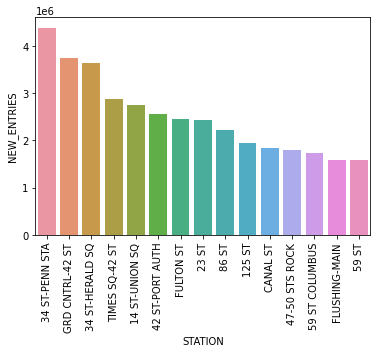

In [121]:
stations_2019_top_ten = stations_2019.iloc[0:15]
first_graph = sns.barplot(x='STATION', y='NEW_ENTRIES',data= stations_2019_top_ten)
plt.xticks(rotation=90)
plt.savefig('Top_Stations.png')

In [122]:
second_viz = first_viz.copy()

In [125]:
second_viz['Day_of_Week'] = second_viz['DATETIME'].dt.dayofweek

In [127]:
def create_mappings(value):
    if value == '00:00:00':
        return 0
    elif value == '04:00:00':
        return (1/6)
    elif value == '08:00:00':
        return (1/3)
    elif value == '12:00:00':
        return (1/2)
    elif value == '16:00:00':
        return (2/3)
    elif value == '20:00:00':
        return (5/6)
    else:
        return None

In [128]:
second_viz['TIME_VALUES'] = second_viz['TIME'].apply(create_mappings)

In [130]:
second_viz['NEXT_INDEX'] = second_viz['Day_of_Week'] + second_viz['TIME_VALUES']

In [132]:
second_viz_time_series = second_viz.groupby(['NEXT_INDEX'],as_index=False)['NEW_ENTRIES'].sum()

In [133]:
second_viz_time_series.head()

,NEXT_INDEX,NEW_ENTRIES
0,0.000000,3314288.0
1,0.166667,755683.0
2,0.333333,3703799.0
3,0.500000,10547669.0
4,0.666667,7209282.0


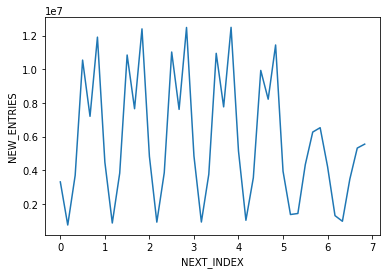

In [135]:
second_graph = sns.lineplot(x = 'NEXT_INDEX',y = 'NEW_ENTRIES', data=second_viz_time_series)
plt.savefig('Time_Series.png')